# Individual Assignment

Import all the relevant packages

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import minimize

### 1. Data Retrieval
In this step, I chose 10 actively traded firms and use yfinance to pull data from Yahoo Finance for 2020-2024.

In [2]:
Tickers = ["NFLX", "AMCR", "IAG", "SMCI", "TSLA", "NVDA", "META", "PCG", "JPM", "AMZN"]
data = yf.download(Tickers, start="2020-01-01", end="2024-12-31")
# save the data to a CSV file in order to reproduce the results
data.to_csv("stock_data.csv")
data

/tmp/ipykernel_1601/1164174321.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(Tickers, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  10 of 10 completed


Price          Close                                                        \
Ticker          AMCR        AMZN   IAG         JPM        META        NFLX   
Date                                                                         
2020-01-02  8.402968   94.900497  3.73  120.733559  208.635391  329.809998   
2020-01-03  8.292298   93.748497  3.64  119.140289  207.531464  325.899994   
2020-01-06  8.236964   95.143997  3.65  119.045586  211.440033  335.829987   
2020-01-07  8.165818   95.343002  3.68  117.021751  211.897522  330.750000   
2020-01-08  8.197438   94.598503  3.47  117.934624  214.045746  339.260010   
...              ...         ...   ...         ...         ...         ...   
2024-12-23  9.313039  225.059998  5.18  235.713257  598.856018  911.450012   
2024-12-24  9.372294  229.050003  5.15  239.589233  606.742920  932.119995   
2024-12-26  9.342667  227.050003  5.20  240.409912  602.350220  924.140015   
2024-12-27  9.322914  223.750000  5.16  238.462036  598.816101  907.549988   
2024-12-30  9.224154  221.300003  5.06  236.632812  590.260254  900.429993   

Price                                                     ...    Volume  \
Ticker            NVDA        PCG       SMCI        TSLA  ...      AMCR   
Date                                                      ...             
2020-01-02    5.971747  10.796279   2.363000   28.684000  ...  10029700   
2020-01-03    5.876163  10.517665   2.344000   29.534000  ...   9447300   
2020-01-06    5.900806  10.328607   2.327000   30.102667  ...   8621700   
2020-01-07    5.972244  10.527616   2.310000   31.270666  ...   9093800   
2020-01-08    5.983445  10.557467   2.307000   32.809334  ...   4951500   
...                ...        ...        ...         ...  ...       ...   
2024-12-23  139.647446  19.935814  32.400002  430.600006  ...  14293300   
2024-12-24  140.197372  20.165190  34.330002  462.279999  ...   4341800   
2024-12-26  139.907410  20.155216  33.740002  454.130005  ...  13904500   
2024-12-27  136.987869  20.085405  31.980000  431.660004  ...   9461200   
2024-12-30  137.467804  20.075434  30.680000  417.410004  ...   8768000   

Price                                                                  \
Ticker          AMZN      IAG       JPM      META     NFLX       NVDA   
Date                                                                    
2020-01-02  80580000  4607300  10803700  12077100  4485800  237536000   
2020-01-03  75288000  4162100  10386800  11188400  3806900  205384000   
2020-01-06  81236000  4972500  10259000  17058900  5663100  262636000   
2020-01-07  80898000  5492600  10531300  14912400  4703200  314856000   
2020-01-08  70160000  8040300   9695300  13475000  7104500  277108000   
...              ...      ...       ...       ...      ...        ...   
2024-12-23  28070000  7591000   8611500  10205800  2339400  176053500   
2024-12-24  15007500  3585500   3729100   4726100  2320300  105157000   
2024-12-26  16146700  2389400   4451800   6081400  2340300  116205600   
2024-12-27  27367100  5865100   5730200   8084200  3226200  170582600   
2024-12-30  28321200  7178500   5723800   7025900  2203000  167734700   

Price                                      
Ticker           PCG      SMCI       TSLA  
Date                                       
2020-01-02   8932400   4178000  142981500  
2020-01-03   5036400    302000  266677500  
2020-01-06   7105400    933000  151995000  
2020-01-07   5492200    387000  268231500  
2020-01-08   7008900   3537000  467164500  
...              ...       ...        ...  
2024-12-23  14179200  26032300   72698100  
2024-12-24   4614500  41339700   59551800  
2024-12-26   4469900  28146700   76366400  
2024-12-27  10354200  32070600   82666800  
2024-12-30   9078200  32119900   64941000  

[1257 rows x 50 columns]

We load data again and clean data to ensure it is.

In [3]:
data = pd.read_csv("stock_data.csv", header=[0,1], index_col=0, parse_dates=True)
# Check for missing values in the dataset
print(data.isnull().sum().sum())
# Check for duplicate rows in the dataset
print(data.duplicated().sum())
data

0
0


Price          Close                                                        \
Ticker          AMCR        AMZN   IAG         JPM        META        NFLX   
Date                                                                         
2020-01-02  8.402968   94.900497  3.73  120.733559  208.635391  329.809998   
2020-01-03  8.292298   93.748497  3.64  119.140289  207.531464  325.899994   
2020-01-06  8.236964   95.143997  3.65  119.045586  211.440033  335.829987   
2020-01-07  8.165818   95.343002  3.68  117.021751  211.897522  330.750000   
2020-01-08  8.197438   94.598503  3.47  117.934624  214.045746  339.260010   
...              ...         ...   ...         ...         ...         ...   
2024-12-23  9.313039  225.059998  5.18  235.713257  598.856018  911.450012   
2024-12-24  9.372294  229.050003  5.15  239.589233  606.742920  932.119995   
2024-12-26  9.342667  227.050003  5.20  240.409912  602.350220  924.140015   
2024-12-27  9.322914  223.750000  5.16  238.462036  598.816101  907.549988   
2024-12-30  9.224154  221.300003  5.06  236.632812  590.260254  900.429993   

Price                                                     ...    Volume  \
Ticker            NVDA        PCG       SMCI        TSLA  ...      AMCR   
Date                                                      ...             
2020-01-02    5.971747  10.796279   2.363000   28.684000  ...  10029700   
2020-01-03    5.876163  10.517665   2.344000   29.534000  ...   9447300   
2020-01-06    5.900806  10.328607   2.327000   30.102667  ...   8621700   
2020-01-07    5.972244  10.527616   2.310000   31.270666  ...   9093800   
2020-01-08    5.983445  10.557467   2.307000   32.809334  ...   4951500   
...                ...        ...        ...         ...  ...       ...   
2024-12-23  139.647446  19.935814  32.400002  430.600006  ...  14293300   
2024-12-24  140.197372  20.165190  34.330002  462.279999  ...   4341800   
2024-12-26  139.907410  20.155216  33.740002  454.130005  ...  13904500   
2024-12-27  136.987869  20.085405  31.980000  431.660004  ...   9461200   
2024-12-30  137.467804  20.075434  30.680000  417.410004  ...   8768000   

Price                                                                  \
Ticker          AMZN      IAG       JPM      META     NFLX       NVDA   
Date                                                                    
2020-01-02  80580000  4607300  10803700  12077100  4485800  237536000   
2020-01-03  75288000  4162100  10386800  11188400  3806900  205384000   
2020-01-06  81236000  4972500  10259000  17058900  5663100  262636000   
2020-01-07  80898000  5492600  10531300  14912400  4703200  314856000   
2020-01-08  70160000  8040300   9695300  13475000  7104500  277108000   
...              ...      ...       ...       ...      ...        ...   
2024-12-23  28070000  7591000   8611500  10205800  2339400  176053500   
2024-12-24  15007500  3585500   3729100   4726100  2320300  105157000   
2024-12-26  16146700  2389400   4451800   6081400  2340300  116205600   
2024-12-27  27367100  5865100   5730200   8084200  3226200  170582600   
2024-12-30  28321200  7178500   5723800   7025900  2203000  167734700   

Price                                      
Ticker           PCG      SMCI       TSLA  
Date                                       
2020-01-02   8932400   4178000  142981500  
2020-01-03   5036400    302000  266677500  
2020-01-06   7105400    933000  151995000  
2020-01-07   5492200    387000  268231500  
2020-01-08   7008900   3537000  467164500  
...              ...       ...        ...  
2024-12-23  14179200  26032300   72698100  
2024-12-24   4614500  41339700   59551800  
2024-12-26   4469900  28146700   76366400  
2024-12-27  10354200  32070600   82666800  
2024-12-30   9078200  32119900   64941000  

[1257 rows x 50 columns]

Therefore, we can confirm that the data has no missing values and duplicated values. We can further do our data exploration now.

### 2. Data Exploration
(1) Present the head and tail of a wide data frame that shows the closing prices for each stock.


In [4]:
# Extract the Close prices for each stock
close = data["Close"]
df = close.copy()

# Present the first 5 rows of each stock's Close prices
print(close.head())

# Present the last 5 rows of each stock's Close prices
print(close.tail())

Ticker          AMCR       AMZN   IAG         JPM        META        NFLX  \
Date                                                                        
2020-01-02  8.402968  94.900497  3.73  120.733559  208.635391  329.809998   
2020-01-03  8.292298  93.748497  3.64  119.140289  207.531464  325.899994   
2020-01-06  8.236964  95.143997  3.65  119.045586  211.440033  335.829987   
2020-01-07  8.165818  95.343002  3.68  117.021751  211.897522  330.750000   
2020-01-08  8.197438  94.598503  3.47  117.934624  214.045746  339.260010   

Ticker          NVDA        PCG   SMCI       TSLA  
Date                                               
2020-01-02  5.971747  10.796279  2.363  28.684000  
2020-01-03  5.876163  10.517665  2.344  29.534000  
2020-01-06  5.900806  10.328607  2.327  30.102667  
2020-01-07  5.972244  10.527616  2.310  31.270666  
2020-01-08  5.983445  10.557467  2.307  32.809334  
Ticker          AMCR        AMZN   IAG         JPM        META        NFLX  \
Date              

(2) Create a single plot showing the closing prices of all ten stocks over the five year period.

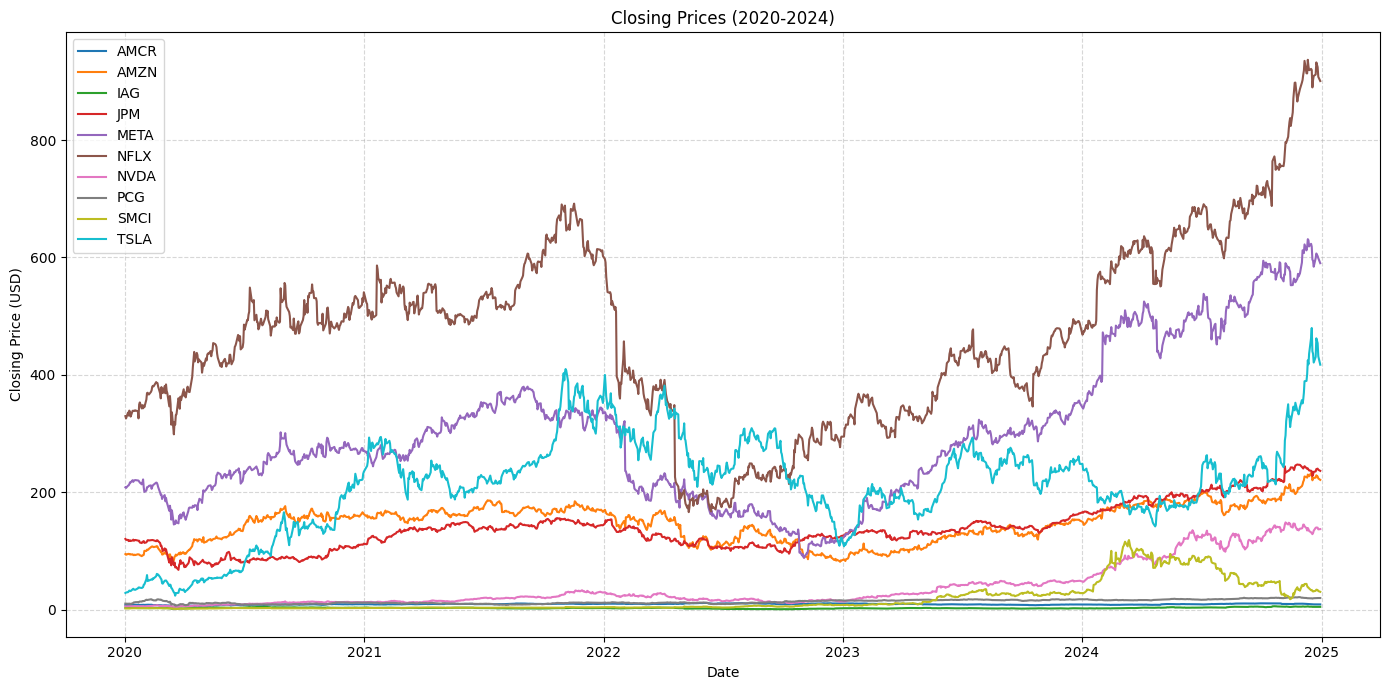

In [5]:
plt.figure(figsize=(14, 7))
for ticker in df.columns:
    plt.plot(df.index, df[ticker], label=ticker)
plt.title("Closing Prices (2020-2024)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend(loc="upper left")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 3. Backtesting
In this section, we will implement and backtest a Bollinger Bands Mean Reversion strategy for each stock.

(1) Generate signals and positions that follows the Bollinger Bands Mean Reversion Strategy.



In [6]:
def Bollinger_strategy(dfi, window=20):
    sma = dfi.rolling(window).mean()
    upper = sma + 2 * dfi.rolling(window).std()
    lower = sma - 2 * dfi.rolling(window).std()

    # Generate Entry/Exit buy/sell signals
    position = 0
    positions = []
    for i in range(len(dfi)):
        if dfi.iloc[i] < lower.iloc[i] and position == 0:
            position = 1  # Enter long
        elif dfi.iloc[i] > upper.iloc[i] and position == 0:
            position = -1  # Enter short
        elif position == 1 and dfi.iloc[i] > sma.iloc[i]:
            position = 0  # Exit long
        elif position == -1 and dfi.iloc[i] < sma.iloc[i]:
            position = 0  # Exit short
        positions.append(position)
    return pd.Series(positions, index=dfi.index)


(2) Calculate the simple daily returns. And then, apply the Bollinger strategy that we have defined above to calculate the strategy daily returns. 

In [7]:
# Apply the Bollinger Bands strategy to each ticker
strategy_returns = {}
buyhold_returns = {}

for ticker in df.columns:
    prices = df[ticker]
    positions = Bollinger_strategy(prices)
    # Calculate simple daily returns and strategy returns
    daily_returns = prices.pct_change().fillna(0)
    # Shift positions in order to avoid lookahead bias
    strat_returns = daily_returns * positions.shift().fillna(0)

    strategy_returns[ticker] = strat_returns
    buyhold_returns[ticker] = daily_returns


(3) Display the end-of-period cumulative return for the strategy vs. buy+hold

In [8]:
# Combine all strategy returns into a DataFrame
stra_returns_df = pd.DataFrame(strategy_returns)
buyhold_returns_df = pd.DataFrame(buyhold_returns)

# Calculate cumulative returns for the strategy and buy-and-hold
cumulative_strategy = (1 + stra_returns_df).cumprod() - 1
cumulative_buyhold = (1 + buyhold_returns_df).cumprod() - 1

# Display the end-of-period cumulative return for each stock
summary = pd.DataFrame({
    "Strategy Cumulative Return": cumulative_strategy.iloc[-1],
    "Buy&Hold Cumulative Return": cumulative_buyhold.iloc[-1]
})
print(summary)

      Strategy Cumulative Return  Buy&Hold Cumulative Return
AMCR                    0.403621                    0.097726
AMZN                   -0.021689                    1.331916
IAG                     0.570661                    0.356568
JPM                     0.207145                    0.959959
META                   -0.292447                    1.829147
NFLX                   -0.511134                    1.730148
NVDA                   -0.533451                   22.019697
PCG                    -0.049783                    0.859477
SMCI                   -0.540804                   11.983496
TSLA                   -0.957668                   13.552015


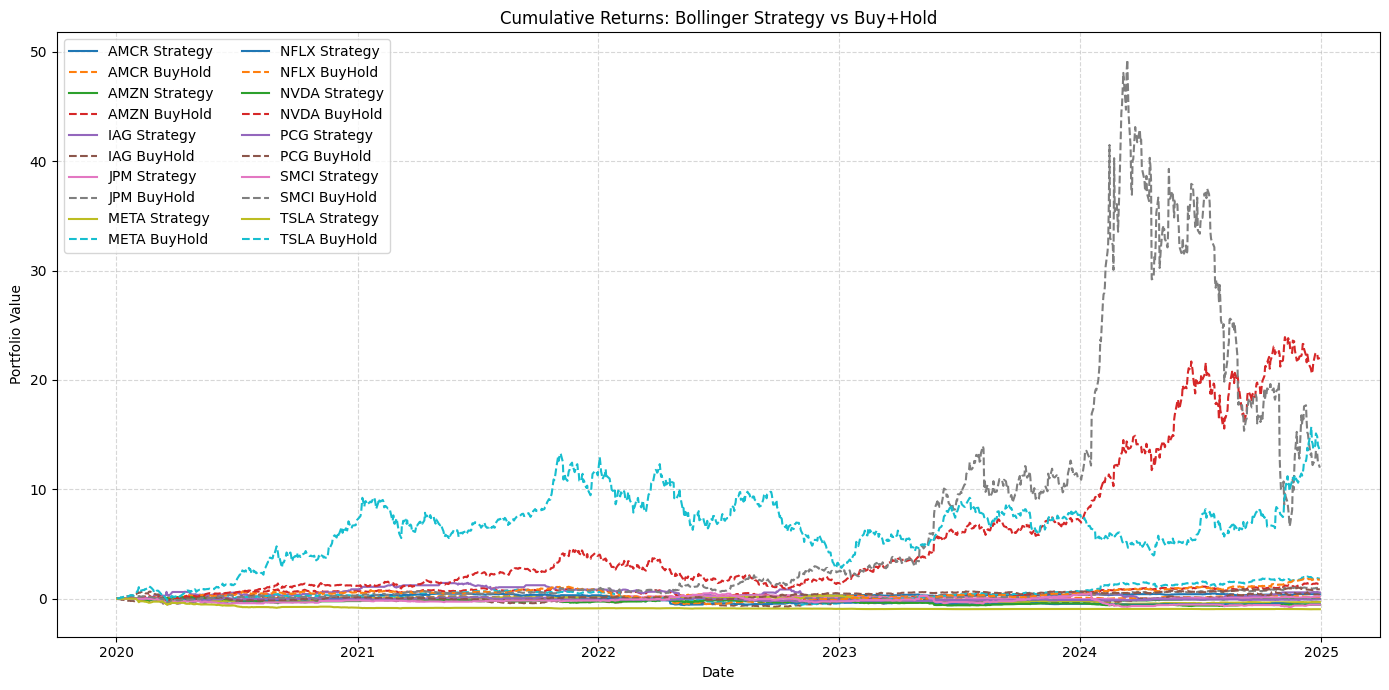

In [9]:
plt.figure(figsize=(14, 7))
for ticker in df.columns:
    plt.plot(cumulative_strategy.index, cumulative_strategy[ticker], label=f"{ticker} Strategy")
    plt.plot(cumulative_buyhold.index, cumulative_buyhold[ticker], '--', label=f"{ticker} BuyHold")
plt.title("Cumulative Returns: Bollinger Strategy vs Buy+Hold")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend(loc="upper left", ncol=2, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 4. Portfolio Management
(1) Visualise the portfolio by plotting the correlation matrix of its simple daily returns.

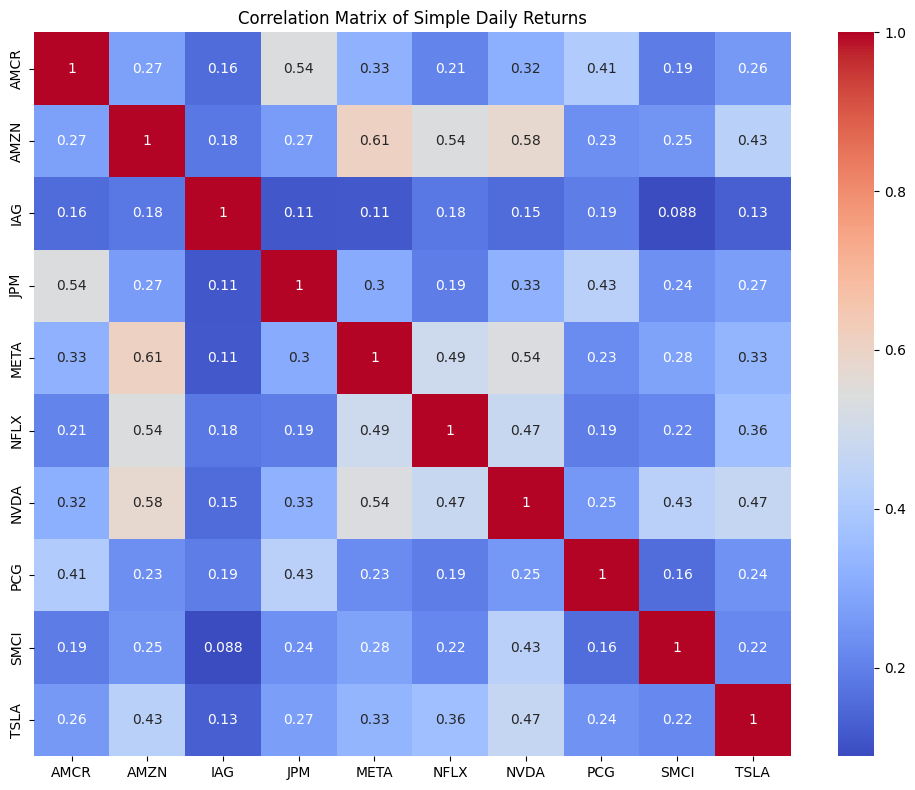

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(buyhold_returns_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Simple Daily Returns")
plt.tight_layout()
plt.show()

(2) Create a portfolio of the 10 stocks with equal initial weights.

In [11]:
weights = np.ones(10) / 10 
# Therefore, we assign equal weights (1/10) to each stock in the portfolio. 

(3) Calculate the portfolio returns and cumulative returns.

In [12]:
portfolio_returns = buyhold_returns_df.dot(weights)
portfolio_cumreturns = (1 + portfolio_returns).cumprod() - 1

(4) Calculate the daily standard deviation of portfolio returns as a risk measurement.

In [13]:
portfolio_std = portfolio_returns.std()

### 5. Portfolio Optimisation
(1) Implement simple portfolio optimisation by maximising the Sharpe Ratio.

In [14]:
RFR = 0.0441
TRADING_DAYS = 252

def negative_sharpe(weights):
    # Calculate annualized portfolio return
    p_returns = np.dot(buyhold_returns_df.mean(), weights) * TRADING_DAYS
    # Calculate annualized portfolio volatility
    cov = buyhold_returns_df.cov() * TRADING_DAYS
    p_volatility = np.sqrt(np.dot(weights, np.dot(cov, weights)))
    sharpe_ratio = (p_returns - RFR) / p_volatility
    return -sharpe_ratio  # Return the negative Sharpe ratio for minimization

# Constraints
cons = {"type": "eq", "fun": lambda x: sum(x) - 1}

# Bounds
bounds = tuple((0, 1) for x in range(10))

# Weights
init_weights = np.ones(10) / 10

# Optimisation
optimal = minimize(negative_sharpe, init_weights, bounds=bounds, constraints=cons)
sharpe_weights = optimal.x

print(f"Optimised Sharpe Ratio: {optimal.fun:.4f}")

print("Optimised Portfolio Weights:")
for ticker, weight in zip(df.columns, sharpe_weights):
    print(f"{ticker}: {weight:.4f}")

Optimised Sharpe Ratio: -1.5079
Optimised Portfolio Weights:
AMCR: 0.0000
AMZN: 0.0000
IAG: 0.0419
JPM: 0.0000
META: 0.0000
NFLX: 0.0000
NVDA: 0.5095
PCG: 0.0000
SMCI: 0.1964
TSLA: 0.2522


(2) Implement an AI-generated portfolio optimisation

According to the results AI generated, I chose Minimum Variance Portfolio

Objective: Minimize portfolio variance.

Metric: Portfolio variance (risk).

Use case: Risk-averse investors.

Constraints: Sum of weights = 1, weights ≥ 0 (long-only).



In [15]:
def portfolio_variance(weights):
    # Calculate annualized covariance matrix
    cov = buyhold_returns_df.cov() * TRADING_DAYS
    # Calculate portfolio variance (scalar)
    variance = np.dot(weights, np.dot(cov, weights))
    return variance

# Constraints
cons = {"type": "eq", "fun": lambda x: np.sum(x) - 1} 

# Bounds
bounds = tuple((0, 1) for x in range(10))

# Weights
init_weights = np.ones(10) / 10

# Optimisation
optimal = minimize(portfolio_variance, init_weights, bounds=bounds, constraints=cons)
variance_weights = optimal.x

print(f"Optimised Portfolio Variance: {optimal.fun:.4f}")

print("Optimised Portfolio Weights for Minimum Variance:")
for ticker, weight in zip(df.columns, variance_weights):
    print(f"{ticker}: {weight:.4f}")

Optimised Portfolio Variance: 0.0562
Optimised Portfolio Weights for Minimum Variance:
AMCR: 0.3513
AMZN: 0.2120
IAG: 0.0681
JPM: 0.2222
META: 0.0000
NFLX: 0.0732
NVDA: 0.0000
PCG: 0.0702
SMCI: 0.0030
TSLA: 0.0000


(3) Visually (by plotting) compare the:

Cumulative Sharpe Ratio optimised portfolio returns;

Cumulative portfolio returns optimised using the AI-generated approach;

Cumulative initial (equal-weighting) portfolio returns.



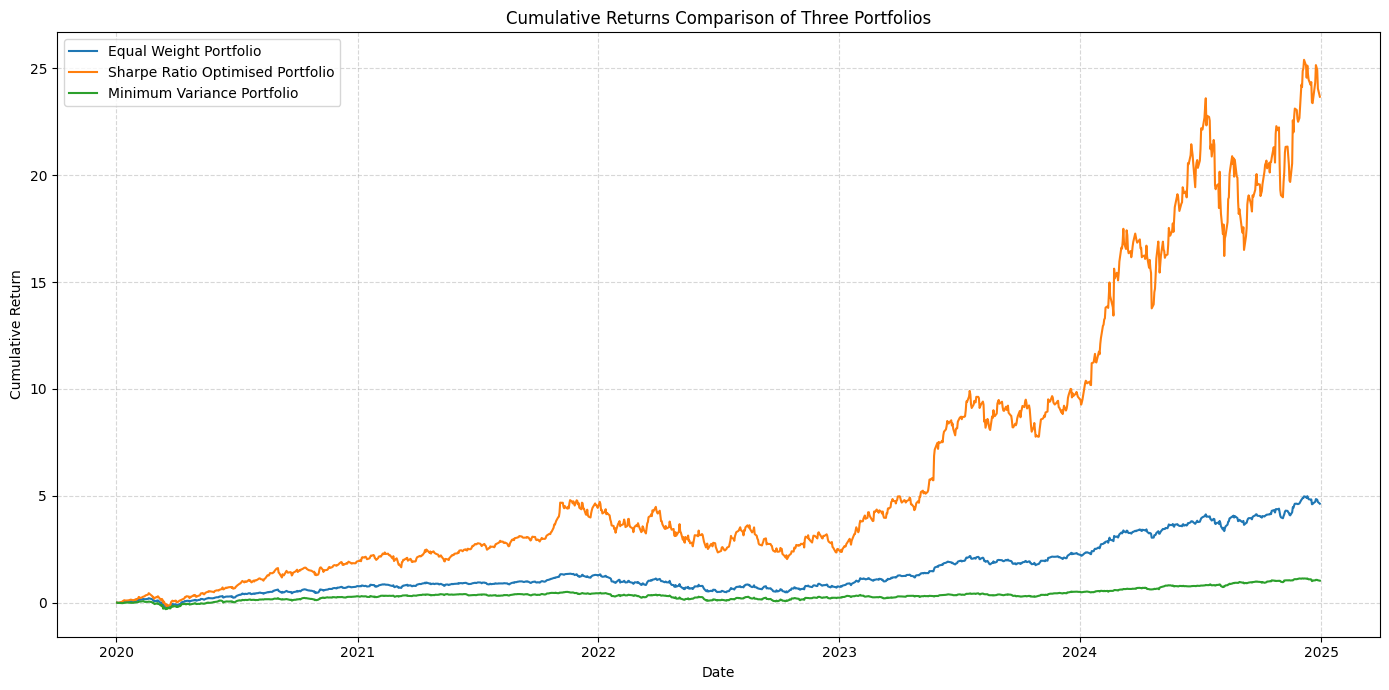

In [16]:
# Cumulative returns for equal weight portfolio
equal_weights = np.ones(10) / 10
equal_returns = buyhold_returns_df.dot(equal_weights)
equal_cumulative = (1 + equal_returns).cumprod() - 1

# Cumulative Sharpe Ratio optimised portfolio returns
sharpe_returns = buyhold_returns_df.dot(sharpe_weights)
sharpe_cumulative = (1 + sharpe_returns).cumprod() - 1

# Cumulative portfolio returns optimised using AI-generated approach (Minimum portfolio variance)
minvar_returns = buyhold_returns_df.dot(variance_weights)
minvar_cumulative = (1 + minvar_returns).cumprod() - 1

# Visualisation
plt.figure(figsize=(14, 7))
plt.plot(equal_cumulative, label="Equal Weight Portfolio")
plt.plot(sharpe_cumulative, label="Sharpe Ratio Optimised Portfolio")
plt.plot(minvar_cumulative, label="Minimum Variance Portfolio")
plt.title("Cumulative Returns Comparison of Three Portfolios")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()